# Lista 2 (7 pkt.)

In [2]:
import string
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

## Zadanie 1. (1 pkt)

To zadanie należy wykonać ręcznie, bez używania komputera, korzystając z instrukcji z **one_time_pad.pdf**. Zaszyfruj wiadomość o treści: "NEW 15 HELICOPTERS", za pomocą klucza: 68496 47757 10126 36660 25066. Do słów, które są w tabeli poniżej użyj odpowiednio ich kodów. Uwaga: w wiadomości jest liczba mnoga "helicopterS".


$\begin{array}{|c|c|c|c|c|c|c|c|c|c|}
\hline
CODE&A&E&I&N&O&T&&\\
0&1&2&3&4&5&6&&&\\
\hline
B&C&D&F&G&H&J&K&L&M\\
70&71&72&73&74&75&76&77&78&79\\
\hline
P&Q&R&S&U&V&W&X&Y&Z\\
80&81&82&83&84&85&86&87&88&89\\
\hline
FIG&.&:&,/'&(/)&+&-&=&REG/?&SPC\\
90&91&92&93&94&95&96&97&98&99\\
\hline
\end{array}$

$\begin{array}{|cc|cc|cc|cc|}
\hline
000&ABORT&253&DECODE&505&MILITARY&758&STREET\\
\hline
019&ACCEPT&262&DELAY&514&MONEY&767&SUBWAY\\
\hline
028&ACCESS&271&DIFFICULT&523&MONTH&776&SUCCESS\\
\hline
037&ADDRESS&280&DOCUMENT&532&MORNING&785&SUPPLY\\
\hline
046&AFFIRMATIVE&299&ENCODE&541&MORSE&794&SUPPORT\\
\hline
055&AGENT&307&EVENING&550&NEGATIVE&802&TELEPHONE\\
\hline
064&AIRPLANE&316&EXECUTE&569&NIGHT&811&TODAY\\
\hline
073&AIRPORT&325&FACTORY&578&OBSERVATION&820&TOMORROW\\
\hline
082&ANSWER&334&FAILED&587&PASSPORT&839&TRAIN\\
\hline
091&AUTHORITY&343&FERRY&596&PERSON&848&TRANSFER\\
\hline
109&BETWEEN&352&FLIGHT&604&PHOTOGRAPH&857&TRANSMIT\\
\hline
118&BORDER&361&FREQUENCY&613&POSITIVE&866&TRAVEL\\
\hline
127&BUILDING&370&HARBOUR&622&POSSIBLE&875&TRUCK\\
\hline
136&CANCEL&389&HELICOPTER&631&POWER&884&UNABLE TO\\
\hline
145&CHANGE&398&HIGHWAY&640&PRIORITY&893&URGENT\\
\hline
154&CIVILIAN&406&IDENTITY&659&PROBLEM&901&VERIFY\\
\hline
163&COMPROMISE&415&IMMEDIATE&668&QUESTION&910&WEEK\\
\hline
172&COMPUTER&424&IMPOSSIBLE&677&RADIO&929&WITHIN\\
\hline
181&CONFIRM&433&INFORMATION&686&RECEIVE&938&YESTERDAY\\
\hline
190&CONTACT&442&INSTRUCTIONS&695&RENDEZVOUS&&\\
\hline
208&COORDINATE&451&LOCATE&703&REPEAT&&\\
\hline
217&COUNTRY&460&LOCATION&712&RESERVATION&&\\
\hline
226&COVERT&479&MAIL&721&ROUTINE&\\
\hline
235&CURRENT&488&MEETING&730&SATELLITE&\\
\hline
244&DANGER&497&MESSAGE&749&SHIP&\\
\hline
\end{array}$

In [3]:
# N E W     1   5       HELICOPTER S
# 4 2 86 90 111 555 90 389        83
# Plain code: KEYID 42869 01115 55903 89839
# OTP Key:    68496 47757 10126 36660 25066
# Cipher text:68496 05112 90099 29343 64873

## Zadanie 2 (1 pkt)

To zadanie również jest do zrobienia ręcznie. Używając klucza 11454 03055 15565 17466 26950 54906 odkoduj wiadomość 11454 00572 94578 25863 84286 24376. Wykorzystaj instrukcje z **one_time_pad.pdf** oraz tablicę kodów z Zadania 1. 


In [4]:
# Cipher text:11454 00572 94578 25863 84286 24376
# OTP Key:    11454 03055 15565 17466 26950 54906
# Plain code: KEYID 03527 09033 32229 00136 78272
#                 FLIGHT B32 CANCELLED

## Zadanie 3. (1 pkt)
Wczytaj obrazki 'miki.png' oraz 'quest.png'.

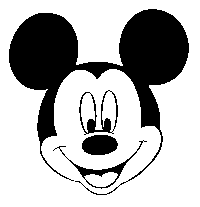

In [5]:
img1 = Image.open('miki.png').convert('L')
img1

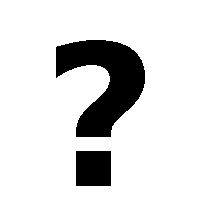

In [6]:
img2 = Image.open('quest.png').convert('L')
img2

Napisz funkcję **add_pic(img1, img2)**, która przyjmuje dwa obrazki i je dodaje piksel po pikselu za pomocą XOR, czyli **biały+biały=czarny, biały+czarny=biały, czarny+czarny=czarny**. Warto wykorzystać to, że **np.array(img)** zwraca tablicę, z wartościami 255 dla białych pikseli i 0 dla czarnych, aby zamienić tablicę z powrotem na obraz należy użyc **Image.fromarray()** przy czym tablica musi być typu **np.uint8** czyli tworząc tablicę podajemy typ: **np.array([1,2,3,4], dtype=np.uint8)**. Funkcja ma zwracać obrazek.

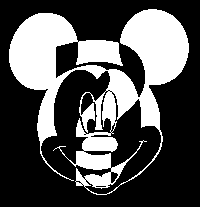

In [7]:
img1 = np.array(img1)
img2 = np.array(img2)

def add_pic(img1, img2):
    img1_array = np.array(img1, dtype=np.uint8)
    img2_array = np.array(img2, dtype=np.uint8)
    
    result_array = np.bitwise_xor(img1_array, img2_array)
    result_img = Image.fromarray(result_array)
    return result_img

img3 = add_pic(img1, img2)
img3

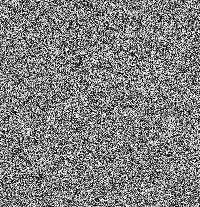

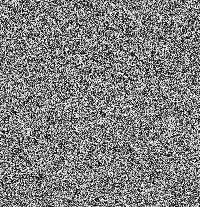

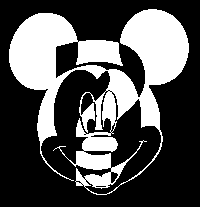

In [8]:
from PIL import Image
import numpy as np

key = np.random.randint(0, 256, size=(img1.shape[0], img1.shape[1]))

img1_encrypted = add_pic(img1, Image.fromarray(key))
img2_encrypted = add_pic(img2, Image.fromarray(key))

result_image_encrypted = add_pic(img1_encrypted, img2_encrypted)

display(img1_encrypted,img2_encrypted)

display(result_image_encrypted)

Wygeneruj (pseudo)losowy klucz, czyli obrazek z losowymi białymi i czarnymi pikselami, użyj **np.random**. Następnie zaszyfruj tym kluczem, za pomocą **add_pic**, oba obrazki **img1** i **img2**. Zauważ, że oba obrazki wyglądają na dobrze zaszyfrowane, zobacz jednak co się wydarzy kiedy dodasz do siebie te zaszyfrowane obrazki.

## Zadanie 4 (2 pkt.)

Zmienne ***msg1_enc*** oraz ***msg2_enc*** zawierają dwie zaszyfrowane wiadomości, w języku angielskim.

In [9]:
msg1_enc = '\x1e\x17\x0c\x12\x1b\x08\x0cf\x0e\x11x\x1a\x1c\x12o\x06\x18\x1f\x17\x03\x10\x01fkh\x1f\x08'
msg2_enc = '\x0b\ni\x07\x1c\x02k\x1f\x16e\x01\x0b\x07\x03\n\x15\x15\x0c\x1el\x07\x03\x03\x16\x01\x01\x02'

Wiadomo, że zostały zaszyfrowane tym samym kluczem, możemy to wykorzystać do odszyfrowania ich. W tym zadaniu konwencja zamiany liter na liczby i ich dodawania jest inna, niż w poprzednich. Znaki zamieniamy na liczby kodujące te znaki w **Unicode**, czyli za pomocą **ord()**, następnie dodajemy je do siebie za pomocą XOR na poziomie bitów, czyli za pomocą **^**. Napisz funkcję **add_str(msg1, msg2)**, które przyjmuje dwa teksty i zwraca tekst będący sumą tych tekstów zgodnie z powyższą konwencją.

In [11]:
def add_str(msg1, msg2):
    result = ''

    for i in range(len(msg1)):
        char1 = ord(msg1[i])
        char2 = ord(msg2[i])

        xor = char1 ^ char2
        result += chr(xor)

    return result

message_sum = add_str(msg1_enc, msg2_enc)
message_sum

'\x15\x1de\x15\x07\ngy\x18ty\x11\x1b\x11e\x13\r\x13\to\x17\x02e}i\x1e\n'

Zauważmy, że jeżeli dwie wiadomości są zaszyfrowane tym samym kluczem to dodanie ich do siebie sprawia, że dostaniemy sumę wiadomości bez klucza. Poza tym zauważmy, że jeżeli znamy jakieś słowo występujące w którejś z wiadomości i je dodamy do sumy tych wiadomości w odpowiednim miejscu to w wyniku dostaniemy poprawne słowo z drugiej wiadomości. Zatem metoda łamania tych wiadomości jest następująca, zgadujemy jakie słowo może być w którejś z wiadomości, dodajemy je w różnych miejscach sumy wiadomości i patrzymy czy powstaje coś co może być fragmentem poprawnego tekstu, następnie na podstawie tego fragmentu zgadujemy większą pozostałą część słowa i teraz to słowo używamy do odczytania kolejnego fragmentu z pierwszej wiadomości.

Pierwsze słowo wybieramy z pośród najpopularniejszych słów w danym języku.

Najpopularniejsze angielskie słowa:
1. THE
2. BE
3. TO
4. OF
5. AND

Uwaga 1: Słowa zapisane są drukowanymi literami.

Uwaga 2: Słowa oddzialane są spacjami, zatem biorąc np. słowo THE należy sprawdzać ciąg znaków "&nbsp; THE &nbsp;", ze spacjami na początku i końcu, dzięki temu odszyfrujemy więcej znaków.

In [14]:
msg_id = 1
msg_1 = 'x' * len(message_sum)
msg_2 = 'x' * len(message_sum)

print(msg_1)
print(msg_2)

while True:
    word = input(f'Message {msg_id} word: ')
    if len(word) == 0:
        print('Finishing')
        break

    for i in range(0, len(message_sum) - len(word) + 1):
        msg_dec_part = add_str(message_sum[i:i + len(word)], word)
        print(f'i = {i} |{msg_dec_part}|')

    index = input(f'Message {msg_id} index: ')
    if len(index) == 0:
        print('Finishing')
        break

    index = int(index)

    msg_dec_part = add_str(message_sum[index:index + len(word)], word)

    if msg_id == 1:
        msg_1 = msg_1[:index] + word + msg_1[index + len(word):]
        msg_2 = msg_2[:index] + msg_dec_part + msg_2[index + len(msg_dec_part):]
        msg_id = 2
    else:
        msg_1 = msg_1[:index] + msg_dec_part + msg_1[index + len(msg_dec_part):]
        msg_2 = msg_2[:index] + word + msg_2[index + len(word):]
        msg_id = 1

    print(f'Message 1: ', msg_1)
    print(f'Message 2: ', msg_2)

print(f'Message 1: ', msg_1)
print(f'Message 2: ', msg_2)

xxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxx
i = 0 |AU |
i = 1 |I-P|
i = 2 |1]B|
i = 3 |AOO|
i = 4 |SB"|
i = 5 |^/<|
i = 6 |31]|
i = 7 |-P1|
i = 8 |L<<|
i = 9 | 1T|
i = 10 |-Y^|
i = 11 |EST|
i = 12 |OY |
i = 13 |E-V|
i = 14 |1[H|
i = 15 |GEV|
i = 16 |Y[L|
i = 17 |GA*|
i = 18 |]'R|
i = 19 |;_G|
i = 20 |CJ |
i = 21 |V-8|
i = 22 |15,|
i = 23 |)![|
i = 24 |=VO|
Message 1:  xxxxxxxxxxTHExxxxxxxxxxxxxx
Message 2:  xxxxxxxxxx-Y^xxxxxxxxxxxxxx
i = 0 |TS!|
i = 1 |\+Q|
i = 2 |$[C|
i = 3 |TIN|
i = 4 |FD#|
i = 5 |K)=|
i = 6 |&7\|
i = 7 |8V0|
i = 8 |Y:=|
i = 9 |57U|
i = 10 |8__|
i = 11 |PUU|
i = 12 |Z_!|
i = 13 |P+W|
i = 14 |$]I|
i = 15 |RCW|
i = 16 |L]M|
i = 17 |RG+|
i = 18 |H!S|
i = 19 |.YF|
i = 20 |VL!|
i = 21 |C+9|
i = 22 |$3-|
i = 23 |<'Z|
i = 24 |(PN|
Message 1:  x\+QxxxxxxTHExxxxxxxxxxxxxx
Message 2:  xANDxxxxxx-Y^xxxxxxxxxxxxxx
Finishing
Message 1:  x\+QxxxxxxTHExxxxxxxxxxxxxx
Message 2:  xANDxxxxxx-Y^xxxxxxxxxxxxxx


## Zadanie 5 (2 pkt.)

W poprzednim zadaniu korzystaliśmu z faktu, że obie wiadomości były zaszyfrowane przy użyciu tego samego klucza. Jednka w praktyce nie wiemy, które i czy w ogóle, wiadomosci były zaszyfrowane przy użyciu tego samego klucza. Możemy to wykryć dokonując analizy statystycznej. Załóżmy, że dodajemy do siebie dwie wiadomości zaszyfrowane tymi samymi kluczami. Wtedy miejsca w których dostaniemy 0 (w konwencji użytej w tym zadaniu znak odpowiadający 0 w Unicode, czyli chr(0)) są miejscami w których w obu wiadomościach była ta sama litera. Jeżeli natomiast dodajemy wiadomości o różnych kluczach będziemy dostawać 0 w losowych miejscach. Zatem w pierwszym przypadku otrzymamy więcej 0.

Zatem należy wczytać wszystkie wiadomości msg1.txt, msg2.txt itd. a następnie dodać je do siebie parami, każda z każdą i policzyć odsetek 0 (tzn. znaków chr(0)) w otrzymanych sumach. Para wiadomości o wyższym niż inne odsetku będzie tą zaszyfrowaną przy u życiu tego samego klucza. Aby łatwiej zauważyć taką parę warto zilustrować sobie wyniki (odsetki 0) za pomocą **plt.imshow(X ,norm=LogNorm())** i użyć skali logarytmicznej, gdzie **X** to tablica 10 na 10 zawierająca odsetki 0 dla każdej pary wiadomości.